In [23]:
!pip install koreanize_matplotlib

In [24]:
import koreanize_matplotlib

In [2]:
df_charging = pd.read_csv('df_charging.csv')

In [3]:
df_charging.head()

,충전소 아이디,충전소 이름,충전기 타입,충전 요일,충전 횟수,충전 시간(hrs),충전량,충전 년도,충전 월,주소,도로명주소,위도,경도
0,50110053,산굼부리,DC차데모+AC3상,금,5,1.332500,45.13,2021,6,제주특별자치도 제주시 조천읍 교래리 166-2,NaN,33.43257409,126.693832
1,50110053,산굼부리,DC차데모+AC3상,목,4,2.086389,51.21,2021,6,제주특별자치도 제주시 조천읍 교래리 166-2,NaN,33.43257409,126.693832
2,50110053,산굼부리,DC차데모+AC3상,수,3,1.842778,44.01,2021,6,제주특별자치도 제주시 조천읍 교래리 166-2,NaN,33.43257409,126.693832
3,50110053,산굼부리,DC차데모+AC3상,월,3,1.108889,32.51,2021,6,제주특별자치도 제주시 조천읍 교래리 166-2,NaN,33.43257409,126.693832
4,50110053,산굼부리,DC차데모+AC3상,일,4,1.920000,59.72,2021,6,제주특별자치도 제주시 조천읍 교래리 166-2,NaN,33.43257409,126.693832


In [29]:
df_charging[df_charging['충전기 타입'] == 'Unknown']['충전 횟수'].sum()

42

In [30]:
df_charging['충전기 타입'].value_counts()

,count
충전기 타입,
DC콤보,34945
AC급속3상,18339
완속,17358
DC차데모,17336
DC차데모+AC3상+DC콤보,7130
DC콤보2(버스충전기용),1731
DC차데모+AC3상,99
Unknown,39


<ipython-input-32-66c5f291d62d>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='충전 횟수', y='충전소 이름', data=sorted_data, palette=colors, ax=axes[0])
<ipython-input-32-66c5f291d62d>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='충전 시간(hrs)', y='충전소 이름', data=sorted_data, palette=colors, ax=axes[1])
<ipython-input-32-66c5f291d62d>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='충전량', y='충전소 이름', data=sorted_data, palette=colors, ax=axes[2])


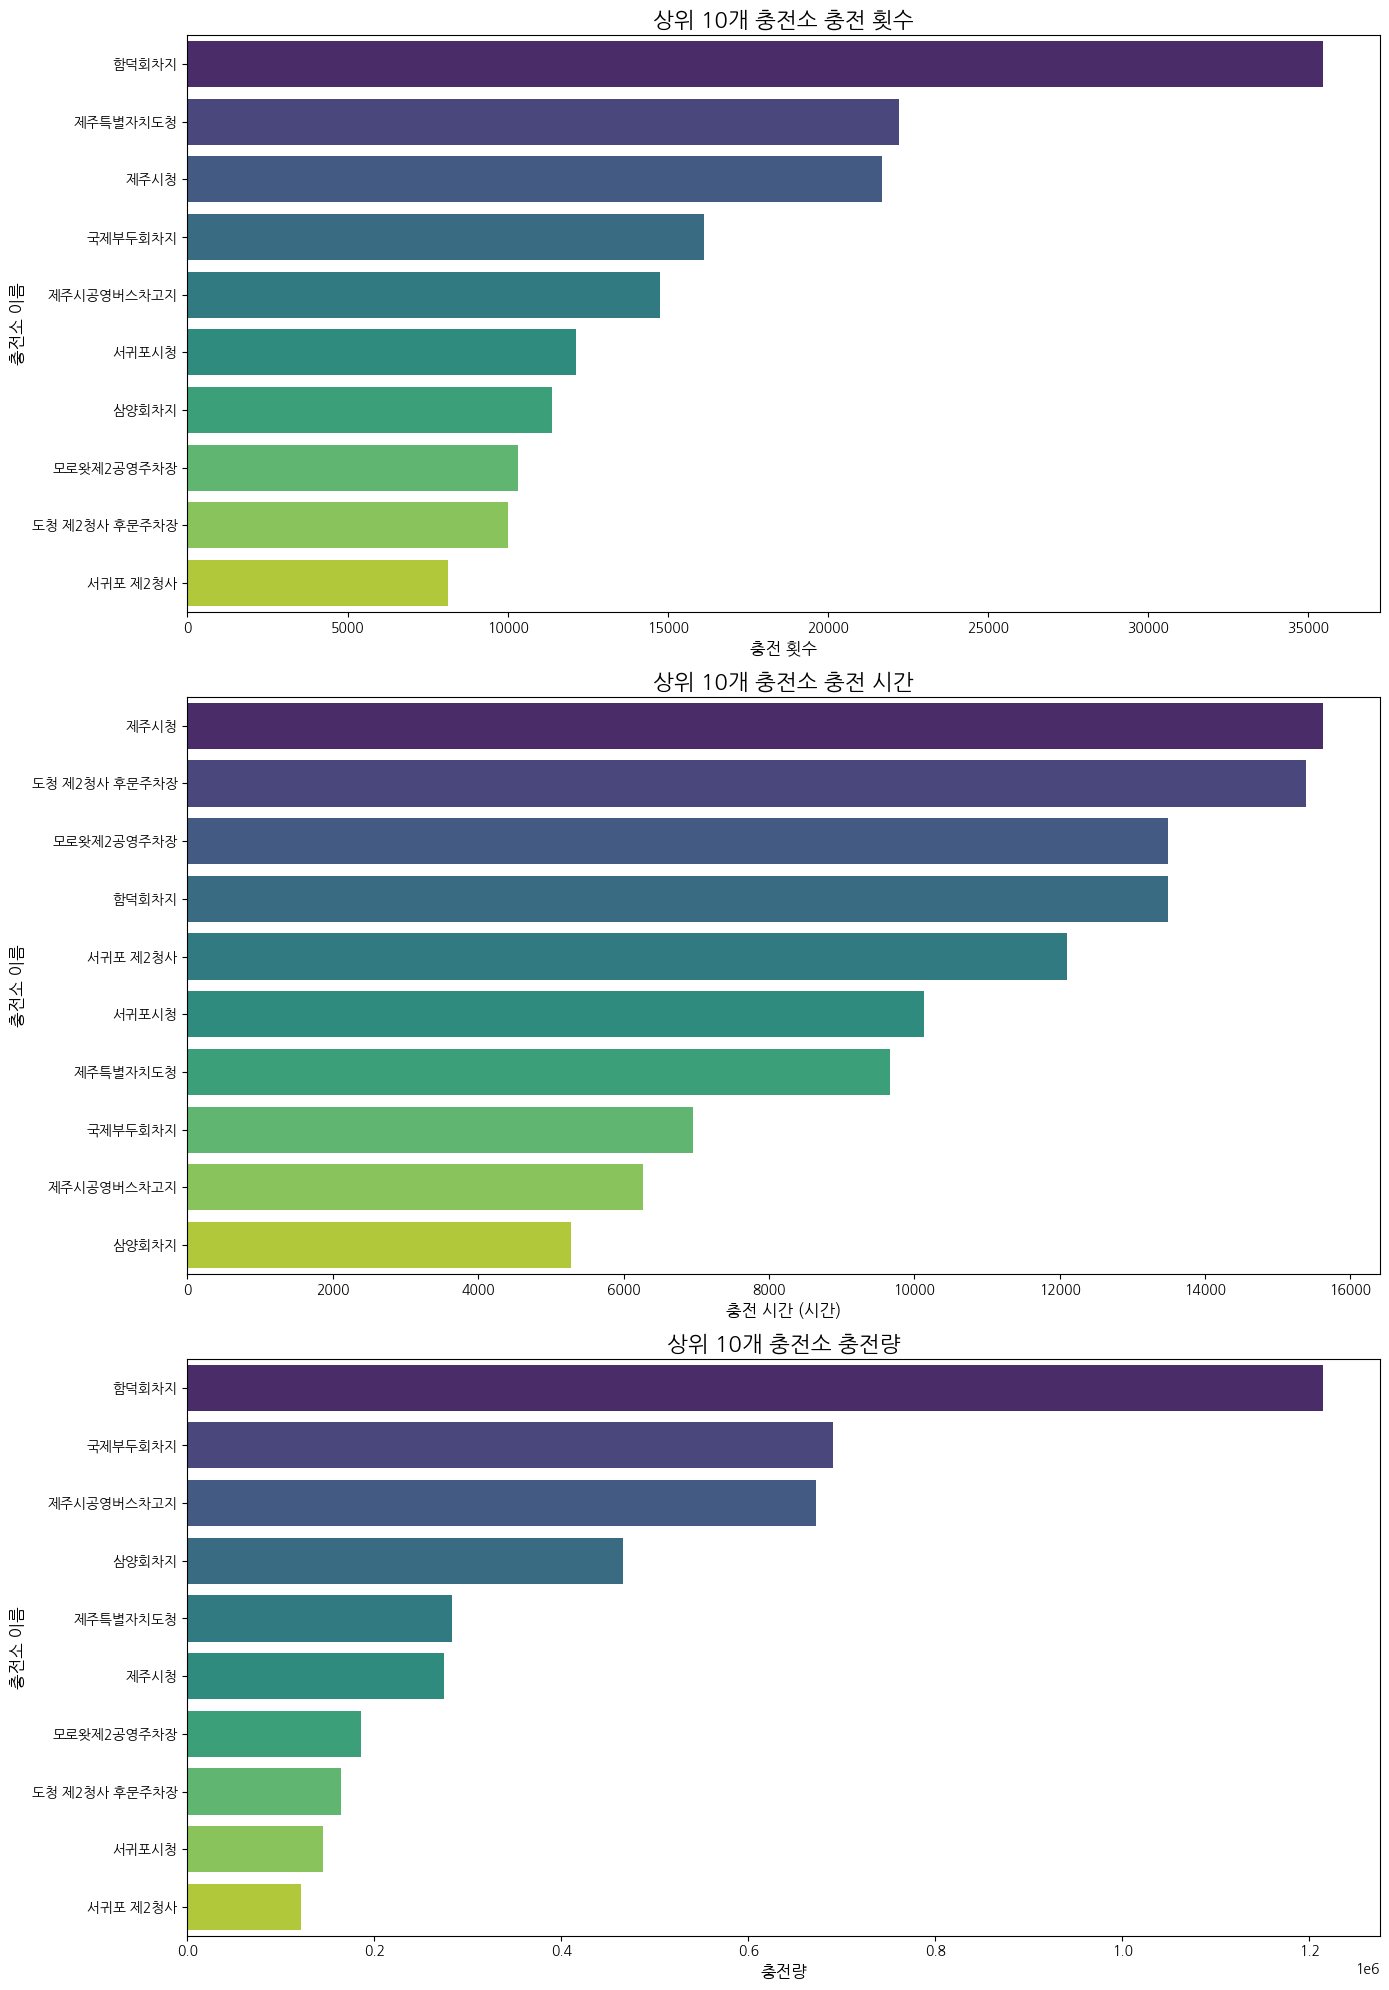

전체 충전소 수: 491
상위 10개 충전소의 비율:
충전 횟수: 18.67%
충전 시간: 17.75%
충전량: 27.61%
위치 정보가 없는 충전소 수: 14


<ipython-input-32-66c5f291d62d>:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charger_type_stats.index, y='충전기 수', data=charger_type_stats, palette=colors, ax=axes[0, 0])
<ipython-input-32-66c5f291d62d>:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charger_type_stats.index, y='충전 횟수', data=charger_type_stats, palette=colors, ax=axes[0, 1])
<ipython-input-32-66c5f291d62d>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charger_type_stats.index, y='충전 시간(hrs)', data=charger_type_stats, palette=colors, ax=axes[1, 0])
<ipython

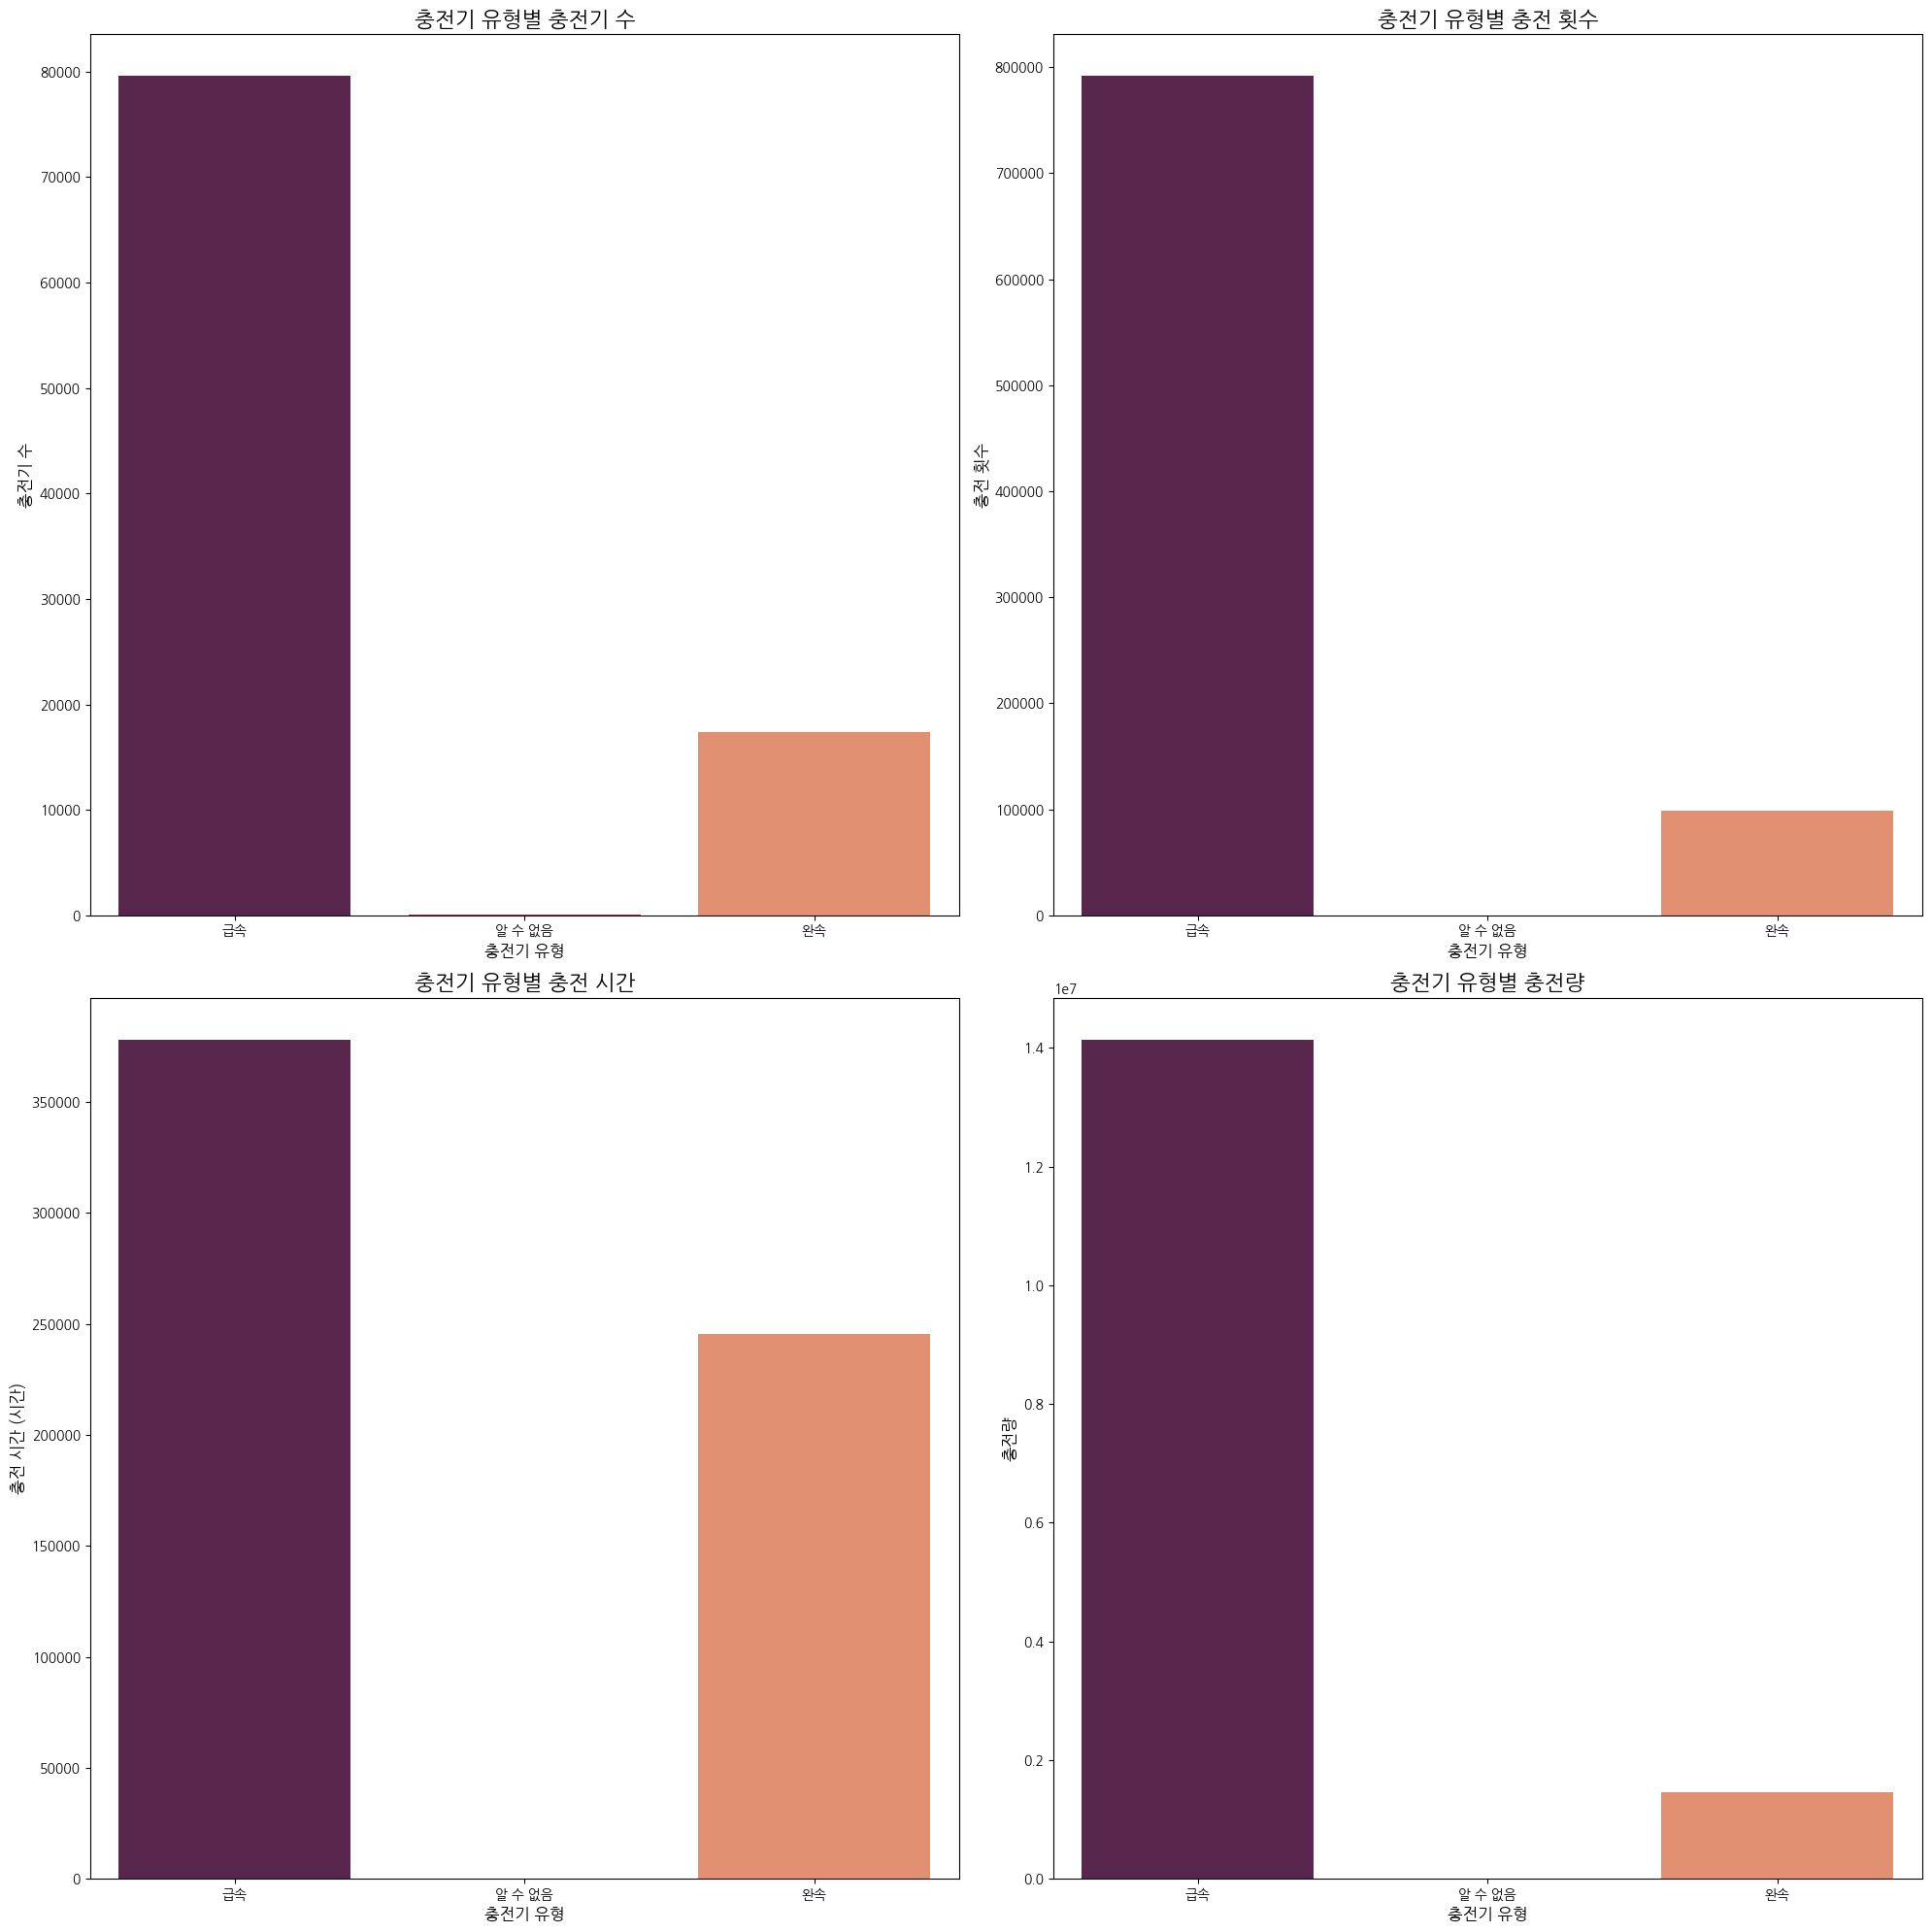


충전기 유형별 통계:
        충전기 수   충전 횟수     충전 시간(hrs)          충전량
충전기 유형                                           
급속      79580  791518  378149.012777  14142457.65
알 수 없음     39      42      19.506111       534.81
완속      17358   98627  245397.082778   1451818.64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import numpy as np
from IPython.display import display

def get_charger_type(charger_type):
    if charger_type in ['DC콤보', 'AC급속3상', 'DC차데모', 'DC차데모+AC3상+DC콤보', 'DC콤보2(버스충전기용)', 'DC차데모+AC3상']:
        return '급속'
    elif charger_type == '완속':
        return '완속'
    else:
        return '알 수 없음'

def analyze_regional_usage(df_charging):
    # 데이터 전처리
    df_charging['위도'] = pd.to_numeric(df_charging['위도'], errors='coerce')
    df_charging['경도'] = pd.to_numeric(df_charging['경도'], errors='coerce')
    df_charging['충전기 유형'] = df_charging['충전기 타입'].apply(get_charger_type)

    # 충전소별 이용률 계산 (충전소 ID와 이름으로 그룹화)
    station_usage = df_charging.groupby(['충전소 아이디', '충전소 이름']).agg({
        '위도': 'first',
        '경도': 'first',
        '충전 횟수': 'sum',
        '충전 시간(hrs)': 'sum',
        '충전량': 'sum',
        '충전기 타입': 'first',
        '충전기 유형': 'first'
    }).reset_index()

    # NaN 값이 있는 행 제거
    station_usage = station_usage.dropna(subset=['위도', '경도'])

    # 이용률 점수 계산 (각 지표의 정규화된 값의 합)
    station_usage['이용률 점수'] = (
        station_usage['충전 횟수'] / station_usage['충전 횟수'].max() +
        station_usage['충전 시간(hrs)'] / station_usage['충전 시간(hrs)'].max() +
        station_usage['충전량'] / station_usage['충전량'].max()
    )

    # 상위 10개 충전소 선택
    top_10_stations = station_usage.nlargest(10, '이용률 점수')

    # 지도 시각화
    m = folium.Map(location=[33.3616, 126.5292], zoom_start=10)
    marker_cluster = MarkerCluster().add_to(m)

    # 모든 충전소를 마커로 표시
    for idx, row in station_usage.iterrows():
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"""
            <b>{row['충전소 이름']}</b><br>
            충전기 유형: {row['충전기 유형']}<br>
            충전기 타입: {row['충전기 타입']}<br>
            충전 횟수: {row['충전 횟수']}<br>
            충전 시간: {row['충전 시간(hrs)']:.2f} 시간<br>
            충전량: {row['충전량']:.2f}
            """,
            tooltip=f"충전소 이름: {row['충전소 이름']}<br>충전기 유형: {row['충전기 유형']}<br>충전기 타입: {row['충전기 타입']}"
        ).add_to(marker_cluster)

    # 상위 10개 충전소를 다른 색상의 마커로 표시
    for idx, row in top_10_stations.iterrows():
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"""
            <b>{row['충전소 이름']} (이용률 {idx+1}위)</b><br>
            충전기 유형: {row['충전기 유형']}<br>
            충전기 타입: {row['충전기 타입']}<br>
            충전 횟수: {row['충전 횟수']}<br>
            충전 시간: {row['충전 시간(hrs)']:.2f} 시간<br>
            충전량: {row['충전량']:.2f}<br>
            이용률 점수: {row['이용률 점수']:.2f}
            """,
            tooltip=f"이용률 {idx+1}위: {row['충전소 이름']}<br>충전기 유형: {row['충전기 유형']}<br>충전기 타입: {row['충전기 타입']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)  # 상위 10개는 클러스터에 포함시키지 않음

    # Colab에서 지도 표시
    display(m)

    # 상위 10개 충전소 바 차트 (정렬 및 그라데이션 적용)
    fig, axes = plt.subplots(3, 1, figsize=(14, 20))

    # 색상 팔레트 설정
    colors = sns.color_palette("viridis", n_colors=10)

    # 충전 횟수 차트
    sorted_data = top_10_stations.sort_values('충전 횟수', ascending=False)
    sns.barplot(x='충전 횟수', y='충전소 이름', data=sorted_data, palette=colors, ax=axes[0])
    axes[0].set_title('상위 10개 충전소 충전 횟수', fontsize=16)
    axes[0].set_xlabel('충전 횟수', fontsize=12)
    axes[0].set_ylabel('충전소 이름', fontsize=12)

    # 충전 시간 차트
    sorted_data = top_10_stations.sort_values('충전 시간(hrs)', ascending=False)
    sns.barplot(x='충전 시간(hrs)', y='충전소 이름', data=sorted_data, palette=colors, ax=axes[1])
    axes[1].set_title('상위 10개 충전소 충전 시간', fontsize=16)
    axes[1].set_xlabel('충전 시간 (시간)', fontsize=12)
    axes[1].set_ylabel('충전소 이름', fontsize=12)

    # 충전량 차트
    sorted_data = top_10_stations.sort_values('충전량', ascending=False)
    sns.barplot(x='충전량', y='충전소 이름', data=sorted_data, palette=colors, ax=axes[2])
    axes[2].set_title('상위 10개 충전소 충전량', fontsize=16)
    axes[2].set_xlabel('충전량', fontsize=12)
    axes[2].set_ylabel('충전소 이름', fontsize=12)

    # 전체 레이아웃 조정
    plt.tight_layout()
    plt.show()

    # 전체 충전소 수와 상위 10개 충전소의 비율 출력
    total_stations = len(station_usage)
    top_10_usage = top_10_stations[['충전 횟수', '충전 시간(hrs)', '충전량']].sum()
    total_usage = station_usage[['충전 횟수', '충전 시간(hrs)', '충전량']].sum()

    print(f"전체 충전소 수: {total_stations}")
    print("상위 10개 충전소의 비율:")
    print(f"충전 횟수: {top_10_usage['충전 횟수'] / total_usage['충전 횟수']:.2%}")
    print(f"충전 시간: {top_10_usage['충전 시간(hrs)'] / total_usage['충전 시간(hrs)']:.2%}")
    print(f"충전량: {top_10_usage['충전량'] / total_usage['충전량']:.2%}")

    # 위치 정보가 없는 충전소 수 출력
    stations_without_location = df_charging[df_charging[['위도', '경도']].isna().any(axis=1)]['충전소 아이디'].nunique()
    print(f"위치 정보가 없는 충전소 수: {stations_without_location}")

    # 충전기 유형별 통계 시각화 (정렬 및 그라데이션 적용)
    charger_type_stats = df_charging.groupby('충전기 유형').agg({
        '충전소 아이디': 'count',
        '충전 횟수': 'sum',
        '충전 시간(hrs)': 'sum',
        '충전량': 'sum'
    }).rename(columns={'충전소 아이디': '충전기 수'})

    fig, axes = plt.subplots(2, 2, figsize=(20, 20))

    # 색상 팔레트 설정
    colors = sns.color_palette("rocket", n_colors=len(charger_type_stats))

    # 충전기 수 차트
    sns.barplot(x=charger_type_stats.index, y='충전기 수', data=charger_type_stats, palette=colors, ax=axes[0, 0])
    axes[0, 0].set_title('충전기 유형별 충전기 수', fontsize=16)
    axes[0, 0].set_xlabel('충전기 유형', fontsize=12)
    axes[0, 0].set_ylabel('충전기 수', fontsize=12)

    # 충전 횟수 차트
    sns.barplot(x=charger_type_stats.index, y='충전 횟수', data=charger_type_stats, palette=colors, ax=axes[0, 1])
    axes[0, 1].set_title('충전기 유형별 충전 횟수', fontsize=16)
    axes[0, 1].set_xlabel('충전기 유형', fontsize=12)
    axes[0, 1].set_ylabel('충전 횟수', fontsize=12)

    # 충전 시간 차트
    sns.barplot(x=charger_type_stats.index, y='충전 시간(hrs)', data=charger_type_stats, palette=colors, ax=axes[1, 0])
    axes[1, 0].set_title('충전기 유형별 충전 시간', fontsize=16)
    axes[1, 0].set_xlabel('충전기 유형', fontsize=12)
    axes[1, 0].set_ylabel('충전 시간 (시간)', fontsize=12)

    # 충전량 차트
    sns.barplot(x=charger_type_stats.index, y='충전량', data=charger_type_stats, palette=colors, ax=axes[1, 1])
    axes[1, 1].set_title('충전기 유형별 충전량', fontsize=16)
    axes[1, 1].set_xlabel('충전기 유형', fontsize=12)
    axes[1, 1].set_ylabel('충전량', fontsize=12)

    # 전체 레이아웃 조정
    plt.tight_layout()
    plt.show()

    # 충전기 유형별 통계 출력
    print("\n충전기 유형별 통계:")
    print(charger_type_stats)

# 데이터 로드
df_charging = pd.read_csv('df_charging.csv')

# 분석 실행
analyze_regional_usage(df_charging)